# Char Embedding dla JanushPasswordGAN
*Notebook miał być krótszy 🙌*

## Zadanie
Na podstawie wszystkich haseł wyznaczyć wartości do nauki sieci neuronowej. Po nauczeniu sieci otrzymamy wektory zależności dla poszczególnych znaków.

## Podzadania
### Znalezienie unikalnych znaków w zbiorze alfabetu haseł
Bierzemy wszystkie hasła i tworzymy zbiór unikalnych znaków, jakie były tam użyte.
##### Info
Funkcja dodatkowo musi porządkować znaki według kolejności alfabetycznej (liczby będą na początku).
##### Przykład
Nasz alfabet składa się ze słów: "abc" oraz "abbd". Na wyjściu otrzymamy wektor: 
```
['a', 'b', 'c', 'd']
```

### Dla każdego znaku wyznaczyć One Hot Vector
Dla każdego unikalnego znaku (dlatego wymagana jest funkcja powyżej) wyznaczamy one hot vector.
#### Co to jest one hot vector?
One hot vector jest to wektor 0 i 1 (zer i jedynek), który będzie jednoznacznie identyfikować każdy znak z podanego alfabetu. W każdym takim wektorze znajduje się jedna 1 (jedynka) i każdy jest długości wektora unikalnych znaków alfabetu. Jedynka występuje w tym miejscu, pod którym znajduje się dany znak w wektorze unikalnych znaków.
##### Info
W tak utworzonej przestrzenii można będzie wyróżnić wektor pusty - nie oznaczający żadnego ze znaków. Wektor taki będzie składał się z samych 0 (zer).
##### Przykład
Nasz alfabet składa się ze słów: "abc" oraz "abbd". Dla takiego alfabetu wyznaczamy unikalne znaki (funkcja powyżej) i otrzymujemy wektor ['a', 'b', 'c', 'd']. Zgodnie z definicją one hot vector'a wektor każdego znaku będzie długości wektora unikalnych znaków, czyli w tym przypadku 4. Wyznaczone one-hot-vectory dla tego przykładu powinny wyglądać następująco:
```
{
    'a': [1, 0, 0, 0],
    'b': [0, 1, 0, 0],
    'c': [0, 0, 1, 0],
    'd': [0, 0, 0, 1]
}
```

### Dla każdego znaku wyznaczyć unikalne ID klasy - numeracja
To zadanie jest dosyć proste. Sieć wyznaczająca Character Embedding będzie wykorzystywać funkje SoftMax oraz CrossEntropy (więcej info poniżej 🙃). Funkcja CrossEntropy jako jeden z argumentów przyjmuje "klasy" do których ma dopasować wyniki. W naszym przypadku jedna klasa to będzie jeden znak. Całe zadanie sprowadza się jedynie do utworzenia słownika, w którym pod indeksami znajdziemy znaki, a jako ich wartości kolejne cyfry.
###### Przykład
```
{
    'a': 0,
    'b': 1,
    'c': 2
}
```


### Dla każdego hasła wyznaczyć wektor one hot wektorów
W tym zadaniu dosłownie musimy przepisać hasło składające się ze znaków na wektor one hot vector'ów. Chodzi o to, by stworzyć reprezentację każdego hasła w formie bardziej siecio neuronowej 😎.
##### Przykład
Nasz alfabet składa się ze słów: "abc" oraz "abbd". Wyznaczamy dla niego unikalne znaki wg. pierwszej funkcji z tego notebook'a i następnie one hot vectory dla każdego znaku (one hot vector'y będzie trzeba podać jako argument wejściowy dla tej funkcji). Na wyjściu powinniśmy otrzymać dwie macierze: jedną dla slowa "abc" i drugą dla "abbd".
```
[
    [
        [1, 0, 0, 0], #znak "a"
        [0, 1, 0, 0], #znak "b"
        [0, 0, 1, 0]  #znak "c"
    ],
    [
        [1, 0, 0, 0], #znak "a"
        [0, 1, 0, 0], #znak "b"
        [0, 1, 0, 0], #znak "b"
        [0, 0, 0, 1]  #znak "d"
    ]
]
    
```

###  Wyznaczenie wielkości okna dla sieci CE (Character Embedding)
Chodzi o znalezienie minimalnej wielkości okna, która pozwoli na prawidłowe wykonanie CE.

#### Jak to ma działać?
CE ma za zadanie wyznaczyć zależności między literami. Z tego też powodu należy każde słowo przepuścić przez SSN (Sztuczną Sieć Neuronową) na kilka przypadków (będzie ich tyle ile jest znaków w danym słowie). W sieci musi się pojawić coś na wejściu i coś na wyjściu. Jako, że SSN ma się nauczyć zależności między znakami, to będziemy operować na znakach. Dla pierwszego przypadku zabieramy ze słowa ostatni znak i umieszczamy jego one hot vector na wyjściu. Następnie wyznaczamy liczbę wejść do sieci, a będzie ich dwukrotna liczba znaków, które zostały po zabraniu tego ostatniego. Całe wejście dzielimy na dwie części - górne i dolne. Do górnego trafią one hot vector'y znaków poprzedzających, ten który jest na wyjściu, a resztę (część dolną) uzupełniamy wartościami pustymi (one hot vector z samymi 0 (zerami)). Dla kolejnego przypadku przesuwamy każdy znak "w dół". To oznacza, że na pierwszym neuronie wejściowym będzie teraz one hot vector zerowy, który był w poprzednim przypadku w dolnej części, a na drugim wejściu znak, który był wcześniej na pierwszym wejściu. Na wyjście sieci przeskakuje znak poprzedzający ten, który się znajdował wcześniej na wyjściu. Znak, który znajdował się na wyjściu przeskakuje do dolnej części na pierwsze wejście tej części.

#### Więc gdzie w tym wszystkim wielkość okna?
Wielkość okna musi pozwalać na swobodne wyznaczenie wszystkich przypadków, tak by znaki z których składa się dane słowo mogłby być poprzerzucane.

##### Przykład
Poniższy rysunek obrazuje wyznaczenie wielkości okna i rozpisanie przypadków dla słowa "abc". Jak widzimy dla słowa składającego się z 3 znaków wielkość okna musi wynosić 4.
![Opis trzech przypadków](https://i.imgur.com/TQOwdIX.png)

### CBOW
Stworzenie sieci w stylu CBOW, by wyznaczyć zależności między znakami i stworzyć wektory dla każdego znaku.

Schemat sieci
![Schemat CBOW](https://i.imgur.com/jdTjKTS.png)

#### Oznaczenia
tx - tensor wejściowy zawierający one hot vector (array).

h1 - neuron warstwy ukrytej.

y1 - tensor wyjściowy zawierający one hot vector (array).


#### Właściwie po co to całe ciboł?
CBOW ma za zadanie wyznaczyć wektory dla znaków.

#### Dobra, to gdzie w tej sieci te wektory?
Wektory dla znaków wejściowych opisują wagi znajdujące się pomiędzy warstwą ukrytą, a wyjściem.
##### Przykład
Dla przykładu słowa "abc" będzie następujący opis wektorów dla znaków
```
[wh1y1, wh2y1, wh3y1], #znak "a"
[wh1y2, wh2y2, wh3y2], #znak "b"
[wh1y2, wh2y3, wh3y3]  #znak "c"
```

#### "Mechanika" CBOW
W sieci możemy zaobserwować swego rodzaju kompresję danych i ich dekompresję (dla przykładu "abc" nie zaobserwujemy tego efektu). Kompresja następuje pomiędzy warstwą wejściową, a warstwą ukrytą (z wielu danych robimy mniejszą ich ilość). Dekompresja następuje między warstwą ukrytą, a warstwą wyjściową (z małej ilości danych robimy ich większą porcję). Daje nam to możliwość odtwarzania(rownoznaczne z dekompresją) słowa na podstawie wektorów. Liczba wektorów będzie wynosić tyle ile jest neuronów w warstwie ukrytej.

#### Ale jak to wektory mają opisywać wagi, skoro wagi się ustalą na samym końcu uczenia i dla wszystkich znaków będą te same? aka. yyyy jakie to ma zależności?

Sam miałem trochę problemów w zrozumieniu na jakiej podstawie można stwierdzić który wektor wag znajdujących się między warstwą ukrytą, a warstwą wyjściową odpowiada któremu znakowi. Odpowiedź jest banalnie prosta. Nie patrzmy na metodę CBOW, jako działającą od lewej do prawej tylko na odwrót. Dla danego znaku, który jest na wyjściu znaczenie w obliczeniach ma tylko jeden wektor, ze względu na kodowanie znaku jako one hot vector - ten, dla którego jako wynik przeliczeń (warstwy ukrytej i wag) wynosi 1. Dla reszty wyniki mają wynosić 0. Oto cała magia 🤗.

##### Przykład 
![Przykład1](https://i.imgur.com/pnwQpDV.png)

### Kompletny schemat sieci do wyznaczenia wektorów 
![Schemat sieci do wyznaczenia wektorów](https://i.imgur.com/r2sg5ZP.png)

[Dokumentacja funkcji CrossEntropyLoss()](https://pytorch.org/docs/stable/nn.html#crossentropyloss)

#### Opis wg. mnie
Kombinacja funkcji Softmax i CrossEntropy ma za zadanie wartościom uzyskanych z sieci (y1,y2,y3,y4) przypisać wartość przynależności do danej klasy (podzadanie wyznaczenia klas). Im niższa wartość tym wartość bardziej przynależy do danej klasy.

##### Przykład
Jak widać wyżej w schemacie dla klasy 'a' (klasa znaku 'a') najniższą wartość, co stanowi o przynależności testowanej klasy. Testowanie klasy polega na obliczeniu wartości 'loss' za pomocą CrossEntropyLoss().

#### Do czego właściwie w CE potrzebujemy Softmax'u i CrossEntropy?
W sumie to jedynie do lepszego procesu uczenia i jak byśmy sie uparli to możemy sobie posprawdzać jakie jest prawdopodobieństwo wystąpienia jakiegoś znaku po danej sekwencji znaków

# Kod robiący magię part1 - przygotowanie wartości do sieci

## Importy
Importujemy bibliotekę Numpy, która jest potrzebna dla części pierwszej naszego CE

In [1]:
import numpy as np

## Funkcje


### Znalezienie unikalnych znaków
Wejściem będzie wektor wyrazów
Wyjściem jest wektor unikalnych znaków

Lepiej rozpisany kod, co by łatwiej go zrozumieć:
```
def find_unique(wektor):
  zwrot = []
  for word in wektor:
    for letter in word:
      if letter not in zwrot:
        zwrot.append(letter)
  return zwrot
  #PS. gdzieś tu jeszcze sorted() by musiało być, ale jako że edytuje to miesiąc później to nwm 😆
```

In [2]:
def find_unique(wektor):
    return np.array(sorted(list({letter for word in wektor for letter in word})))
  
find_unique(['abcf', 'abcd', 'abcde'])

array(['a', 'b', 'c', 'd', 'e', 'f'], dtype='<U1')

### Wyznaczenie One Hot Vectors
Wejściem jest wektor unikalnych znaków

Wyjściem jest słownik z one hot vector'ów podpisanych pod znak, który reprezentują

Lepiej rozpisany kod, co by łatwiej go zrozumieć
```
def make_one_hot_vectors(wektor):
  zwrot = {}
  for cnt in range(len(wektor)):
    vec = []
    for ii in range(len(wektor)):
      if ii == cnt:
        vec.append(1)
      else:
        vec.append(0)
    zwrot[wektor[cnt]] = vec
  return zwrot
```



In [3]:
def make_one_hot_vectors(wektor):
    return {wektor[cnt]:[1 if ii == cnt else 0 for ii in range(len(wektor))] for cnt in range(len(wektor))}
  
make_one_hot_vectors(['a', 'b', 'c', 'd', 'e'])

{'a': [1, 0, 0, 0, 0],
 'b': [0, 1, 0, 0, 0],
 'c': [0, 0, 1, 0, 0],
 'd': [0, 0, 0, 1, 0],
 'e': [0, 0, 0, 0, 1]}

### Wyznaczenie ID klasy
Wejściem są wyznaczone wcześniej one hot vectory dla unikalnych znaków
Wyjściem jest słownik, którego kluczami są znaki dla których wyznaczono one hot vectory, a kluczami ID klas

In [4]:
def make_class_id(one_hot_vectors):
    zwrot = {}
    
    for cnt, one_hot_vector in enumerate(one_hot_vectors):
        zwrot[one_hot_vector] = cnt
        
    return zwrot

make_class_id(make_one_hot_vectors(['a', 'b', 'c', 'd', 'e']))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

### Wyznaczenie wektora one hot wektorów
Wejście to słowo oraz słownik wcześniej wyznaczonych one hot wektorów dla znaków

Wyjście to tablica one hot vectorów dla słowa

In [5]:
def make_word_vector(word, onehotvectors):
    return np.array([onehotvectors[letter] for letter in word])

for slowo in ['abc', 'abcd', 'abcde']:
    print(make_word_vector(slowo, make_one_hot_vectors(['a', 'b', 'c', 'd', 'e'])))

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]]
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]]
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


### Wyznaczenie wielkości okna oraz wszelkich kombinacji dla słowa w CE aka. wyznaczenie wartości do nauki sieci
Generalnie było dużo rozkmin jak to zrobić, bo dużo się dzieje w tym. 

Musimy przepisać nasze wektory one hot wektorów na bezpośrednie wartości, które będą podane do sieci zachowujac wszelkie kombinacje znaków. 

Zobrazowałem działanie funkcji na pierwszym obrazie w tym notebook'u - tworzy ona kombinacje wartości.

Wejściem jest one hot wektor słowa
Wyjściem jest:
+ inputs dla sieci neuronowej
+ outputs dla sieci neuronowej

In [6]:
def get_min_window_size(wordlen):
    return 2*(wordlen-1)


def make_pre_char_embedding(wektoryslow, windowsize, fill = 0):
    
    ''' definicje wejsc i wyjsc '''
    inns = []
    outs = []
    
    ''' lecimy po kazdym wektorze one hot vectorow '''
    for wektor in wektoryslow:
        ''' dla kazdego wektora sprawdzamy minimalna dlugosc okna, by sprawdzic czy jest zgodnosc z argumentem "windowsize" '''
        min_window_size = get_min_window_size(len(wektor))

        ''' sprawdzenie poprawności podanych danych '''
        if min_window_size > windowsize:
            raise Exception("Bledna wielkosc okna, powinna wynosic minimum: " + str(min_window_size) + ", a mam: " + str(windowsize))
        
        ''' nie obsługujemy słów krótszych od 3 '''
        if len(wektor) < 3:
            raise Exception("Wektor zbyt krotki. Dlugosc powinna wynosic minimum 3")
        
        ''' lokalne wartości inputs i outputs '''
        ''' w nich  przechowujemy "kombinacje" dla wszystkich znaków jednego słowa'''
        inputs = []
        outputs = []

        ''' tutaj jest bardzo ważna wartość wyliczana '''
        ''' mając wielkość okna = 8, a słowo wielkości 3 musimy tak ułożyć znaki tego słowa, '''
        ''' by znajdowały się one na środkowych pozycjach '''
        ''' ta wartość jest indeksem, o który należy przesunąć znaki słowa '''
        beginfill = int((windowsize-min_window_size)/2)

        ''' outed zawiera index one hot vectora słowa, które znajduje się na wyjściu sieci '''
        outed = len(wektor)- 1
        
        ''' zbudowanie pierwotnego okna '''
        ''' początek okna wypełniamy one hot vectorami znaków,'''
        ''' a resztę zerami '''
        window = [wektor[x-beginfill] if (x < len(wektor)+beginfill-1) and (x > beginfill - 1) else [fill for xx in range(len(wektor[0]))] for x in range(windowsize)]

        ''' dodajemy do tablic '''
        inputs.append(window)
        outputs.append(wektor[outed])

        ''' i tutaj główna pętla przekształceń '''
        ''' dużo rozkmin było jak zrobić wszystkie kombinacje dla danego słowa, '''
        ''' ale python jest wspaniały jeżeli chodzi o operacje na tablicach, '''
        ''' więc przesunięcie wszystkich znaków o jeden do przodu to po prostu pierwsza instrukcja pętli 💚 '''
        ''' następnie robimy podmiankę wartości wyjściowej '''
        ''' i zamieniamy indeks wyjścia '''
        for x in range(len(wektor) - 1):
            window = [window[-1]] + window[:-1]
            window[outed+beginfill+x] = wektor[outed]
            outed = outed - 1
            #print(window)

            inputs.append(window)
            outputs.append(wektor[outed])
        
        
        ''' inputy i outputy dla konkretnego słowa dodajemy do inputów i outputów całościowych '''
        inns = inns + inputs
        outs = outs + outputs
    
    return np.array(inns, dtype=int), np.array(outs, dtype=int)
    #return inputs, outputs

inputs, outputs = make_pre_char_embedding([make_word_vector("abc", make_one_hot_vectors(find_unique(['abc'])))], 8)
#inputs, outputs = make_pre_char_embedding([make_word_vector("abc", make_one_hot_vectors(find_unique(['abc']))), make_word_vector("abcde", make_one_hot_vectors(find_unique(['abcde'])))], 8)
print("WEJSCIA")
print(inputs)
print("\nWYJSCIA")
print(outputs)

WEJSCIA
[[[0 0 0]
  [0 0 0]
  [1 0 0]
  [0 1 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [1 0 0]
  [0 0 1]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 1 0]
  [0 0 1]
  [0 0 0]
  [0 0 0]]]

WYJSCIA
[[0 0 1]
 [0 1 0]
 [1 0 0]]


### Funkcje pomocnicze


In [7]:
def find_longest_word(wektor):
    longest = 0
    for slowo in wektor:
        if len(slowo) > longest:
            longest = len(slowo)
    return longest

### Funkcje tłumaczące różne postacie znaków

In [8]:
def translate_class_to_sign(classid, classdict):
    for item in classdict:
        if classdict[item] == classid:
            return item
        
translate_class_to_sign(1, make_class_id(make_one_hot_vectors(['a', 'b', 'c', 'd', 'e'])))

'b'

In [9]:
def translate_sign_to_class(sign, classdict):
    return classdict[sign]

translate_sign_to_class('b', make_class_id(make_one_hot_vectors(['a', 'b', 'c', 'd', 'e'])))

1

In [10]:
def translate_one_hot_vector_to_sign(one_hot_vector, one_hot_vectors):
    for item in one_hot_vectors:
        if np.array_equal(np.array(one_hot_vectors[item]), one_hot_vector):
            return item
        
translate_one_hot_vector_to_sign(np.array([0,1,0,0,0]), make_one_hot_vectors(['a', 'b', 'c', 'd', 'e']))

'b'

# Job/Magic
## Info

Jest tutaj małe demo prezentujące działanie funkcji, które zostały utworzone wyżej 😎

In [11]:
''' lista naszych slow '''
#hasla = ["123456", 
#         "neo24", 
#         "qwerty", 
#         "monika", 
#         "1235", 
#         "misiek"]

hasla = ["abc", "abcd", "abcde"]



''' wyszukujemy unikalne znaki i tworzymy one hot wektory '''
unique = find_unique(hasla)
onehots = make_one_hot_vectors(unique)




''' przepisujemy slowa na one hot vectory ''' 
word_vectors = []

for haslo in hasla:
    word_vectors.append(make_word_vector(haslo, onehots))
    
    
    
    
''' znajdujemy najdluzsze slowo i minimalna wielkosc okna ''' 
longestword = find_longest_word(hasla)
min_window = get_min_window_size(longestword)

''' tworzymy wartosci do uczenia dla sieci '''
inputs, outputs = make_pre_char_embedding(word_vectors ,min_window)
  
    
    
''' printy na wszystko, co tu sie dzialo '''    
print("UNIKALNE ZNAKI")  
print(unique)

print("\n\nONE-HOT-VECTORS")
for onehot in onehots:
    print(onehot, onehots[onehot])
    
print("\n\nHASLA ZAPISANE ONE-HOT-WEKTORAMI")
for word_vector in word_vectors:
    print(word_vector)
    
print("\n\nNAJDLUZSZY WYRAZ: ", longestword) 

print("\n\nMIN WINDOW SIZE: ", min_window)

print("\n\nINPUTY DLA SIECI")
for inn in inputs:
    print(inn)

print("\n\nOUTPUTY DLA SIECI")
for out in outputs:
    print(out)

UNIKALNE ZNAKI
['a' 'b' 'c' 'd' 'e']


ONE-HOT-VECTORS
a [1, 0, 0, 0, 0]
b [0, 1, 0, 0, 0]
c [0, 0, 1, 0, 0]
d [0, 0, 0, 1, 0]
e [0, 0, 0, 0, 1]


HASLA ZAPISANE ONE-HOT-WEKTORAMI
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]]
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]]
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


NAJDLUZSZY WYRAZ:  5


MIN WINDOW SIZE:  8


INPUTY DLA SIECI
[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0

# Kot 🐱 robiący magię part2 - SSN 
W tej części najfajniejsza zabawa. Zaczniemy od wprowadzenia całego modelu sieci i omówienia go na prostym przykładzie, czyli hasła "abc". 

Całość oparta na frameworku PyTorch

In [12]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

### Zbudowanie modelu

Klasa w konstruktorze przyjmuje dwa parametry. Pierwszym jest ilość wejść do sieci, która musi odpowiadać minimalnenej wielkości okna. Drugim argumentem jest ilość wyjść, która musi być równa najdłuższemu wyrazowi, co jest równe wielkości jednego one hot vector'a.

In [13]:
class CBOW(nn.Module):
    def __init__(self, inputs, outputs):
        super(CBOW, self).__init__()
        
        self.fc_in = nn.Linear(in_features=inputs, out_features=4)
        self.fc_out = nn.Linear(in_features=4, out_features=outputs)
        
    def forward(self, x):
        x = self.fc_in(x)
        x = self.fc_out(x)
        return x

### Przygotowanie danych trenujących

#### Funkcja pomocnicza do tłumaczenia one hot wektora na klasę

In [14]:
def translate_labels_to_classes(labels, classdict, one_hot_vectors):
    return np.array([translate_sign_to_class(translate_one_hot_vector_to_sign(item, one_hot_vectors), classdict) for item in labels])

Mamy tutaj swego rodzaju zdublowanie podsumowania części pierwszej dotyczącej character embeddings

In [15]:
''' zebranie slow '''
slowa = ["123456", 
         "neo24", 
         "qwerty", 
         "monika", 
         "1235", 
         "misiek", 
         "zakupy", 
         "karolina", 
         "kasia", 
         "1234", 
         "marcin", 
         "tasior", 
         "bartek", 
         "samsung", 
         "tomek", 
         "beata", 
         "kacper", 
         "kasia1", 
         "111111", 
         "grzegorz", 
         "myszka", 
         "mateusz", 
         "pralka", 
         "michal", 
         "weronika", 
         "123qwe", 
         "wojtek", 
         "mercedes"]



''' znalezienie unikalnych znakow i utworzenie one hot vectorow dla znakow '''
unikalne = find_unique(slowa)
onehotvectory = make_one_hot_vectors(unikalne)


''' przepisanie slow na one hot vectory '''
wyrazy = [make_word_vector(slowo, onehotvectory) for slowo in slowa]



''' zbudowanie klas dla poszczegolnych znakow'''
classdict = make_class_id(onehotvectory)
print(classdict, '\n')


''' znalezienie najdluzszego slowa i minimalnej wielkosci okna '''
najdluzszeslowo = find_longest_word(slowa)
minimalnawielkoscokna = get_min_window_size(najdluzszeslowo)

''' przygotowanie danych do uczenia '''
training_data, training_data_labels = make_pre_char_embedding(wyrazy, minimalnawielkoscokna)
    
print(training_data, '\n')
print(training_data_labels, '\n')

training_data_classes = translate_labels_to_classes(training_data_labels, classdict, onehotvectory)
print(training_data_classes)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, 'a': 6, 'b': 7, 'c': 8, 'd': 9, 'e': 10, 'g': 11, 'h': 12, 'i': 13, 'j': 14, 'k': 15, 'l': 16, 'm': 17, 'n': 18, 'o': 19, 'p': 20, 'q': 21, 'r': 22, 's': 23, 't': 24, 'u': 25, 'w': 26, 'y': 27, 'z': 28} 

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0

### Prezentacja postaci danych
Czyli pokazanie wielkości macierzy, jakie trafiają do sieci

In [16]:
print('ksztalt macierzy przed przeksztalceniem', training_data.shape, '\n')
print('macierz przed przeksztalceniem', training_data, '\n')
training_data = training_data.reshape(training_data.shape[0], -1)
print('ksztalt macierzy po przeksztalceniu', training_data.shape, '\n')
print('macierz do podania do sieci', training_data)

ksztalt macierzy przed przeksztalceniem (170, 14, 29) 

macierz przed przeksztalceniem [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] 

ksztalt macierzy po przeksztalceniu (170, 406) 

macierz do podania do sieci [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ..

In [17]:
print('ilosc probek do uczenia sieci', training_data.shape[1])
print('ilosc probek na wyjsciu sieci', training_data_classes.shape[0])

ilosc probek do uczenia sieci 406
ilosc probek na wyjsciu sieci 170


### Jeżeli dostępne jest GPU to przenosimy dane na GPU

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

### Utworzenie modelu sieci

In [19]:
CBOW = nn.DataParallel(CBOW(training_data.shape[1], len(unikalne)))

### Tworzenie tensorów

In [20]:
''' Tensor z wartościami wejściowymi '''
TensorX = torch.Tensor(training_data).to(device)

''' Tensor z klasami, które mają się pokazywać na wyjściu '''
TensorClass = torch.tensor(training_data_classes).long().to(device)

#### Postać tensorów

In [21]:
print(TensorX)
print(TensorClass)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
tensor([ 5,  4,  3,  2,  1,  0,  3,  1, 19, 10, 18, 27, 24, 22, 10, 26, 21,  6,
        15, 13, 18, 19, 17,  4,  2,  1,  0, 15, 10, 13, 23, 13, 17, 27, 20, 25,
        15,  6, 28,  6, 18, 13, 16, 19, 22,  6, 15,  6, 13, 23,  6, 15,  3,  2,
         1,  0, 18, 13,  8, 22,  6, 17, 22, 19, 13, 23,  6, 24, 15, 10, 24, 22,
         6,  7, 11, 18, 25, 23, 17,  6, 23, 15, 10, 17, 19, 24,  6, 24,  6, 10,
         7, 22, 10, 20,  8,  6, 15,  0,  6, 13, 23,  6, 15,  0,  0,  0,  0,  0,
         0, 28, 22, 19, 11, 10, 28, 22, 11,  6, 15, 28, 23, 27, 17, 28, 23, 25,
        10, 24,  6, 17,  6, 15, 16,  6, 22, 20, 16,  6, 12,  8, 13, 17,  6, 15,
        13, 18, 19, 22, 10, 26, 10, 26, 21,  2,  1,  0, 15, 10, 24, 14, 19, 26,
        2

### Wybranie optymizera oraz funkcji LOSS

In [22]:
''' Adam optimizer '''
optimizer = optim.Adam(CBOW.parameters(), lr=1e-4)



''' CrossEntropy jako loss '''
criterion = nn.CrossEntropyLoss() #z softmaxem

### Opisanie obiektu sieci

In [23]:
CBOW

DataParallel(
  (module): CBOW(
    (fc_in): Linear(in_features=406, out_features=4, bias=True)
    (fc_out): Linear(in_features=4, out_features=29, bias=True)
  )
)

### Sprawdzenie tensora wejściowego

In [24]:
TensorX

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

### Sprawdzenie tensora wyjściowego (tensora klas)

In [25]:
TensorClass

tensor([ 5,  4,  3,  2,  1,  0,  3,  1, 19, 10, 18, 27, 24, 22, 10, 26, 21,  6,
        15, 13, 18, 19, 17,  4,  2,  1,  0, 15, 10, 13, 23, 13, 17, 27, 20, 25,
        15,  6, 28,  6, 18, 13, 16, 19, 22,  6, 15,  6, 13, 23,  6, 15,  3,  2,
         1,  0, 18, 13,  8, 22,  6, 17, 22, 19, 13, 23,  6, 24, 15, 10, 24, 22,
         6,  7, 11, 18, 25, 23, 17,  6, 23, 15, 10, 17, 19, 24,  6, 24,  6, 10,
         7, 22, 10, 20,  8,  6, 15,  0,  6, 13, 23,  6, 15,  0,  0,  0,  0,  0,
         0, 28, 22, 19, 11, 10, 28, 22, 11,  6, 15, 28, 23, 27, 17, 28, 23, 25,
        10, 24,  6, 17,  6, 15, 16,  6, 22, 20, 16,  6, 12,  8, 13, 17,  6, 15,
        13, 18, 19, 22, 10, 26, 10, 26, 21,  2,  1,  0, 15, 10, 24, 14, 19, 26,
        23, 10,  9, 10,  8, 22, 10, 17], device='cuda:0')

### Wypisanie wielkości macierzy tensorów

In [26]:
TensorX.shape

torch.Size([170, 406])

In [27]:
TensorClass.shape

torch.Size([170])

### Wypisanie wielkości wag

In [28]:
CBOW.module.fc_in.weight.shape

torch.Size([4, 406])

In [29]:
CBOW.module.fc_out.weight.shape

torch.Size([29, 4])

### Test pierwszego przeliczenia sieci

In [30]:
y = CBOW(TensorX)

## Uczenie sieci 👽
### Wyjaśnienie poszczególnych zależności
```loss.backward(), optimizer.step(), optimizer.zero_grad(), CBOW.train()```

pytorch umożliwia ustawienie sieci w tryb uczenia (bardziej złożony obliczeniowo) dlatego stosuje się na początku polecenie ```CBOW.train()```

```optimizer.step()``` aktualizuje parametry bazując na obecnej wartości gradientu. Wywołując ```loss.backward()``` sumuje wartości gradientu dla każdego parametru, dlatego po każdym ```optimizer.step()``` powinniśmy go wyzerować wykorzystując ```optimizer.zero_grad()```.

W niektórych typach sieci np. rekurencyjnych korzysta się z sumowania wartości gradientu i nie zeruje się jej.

In [34]:
''' ustawiamy tablice do stworzenia wykresiku '''
lossx = []
lossy = []

''' Właściwa nauka sieci '''
for epoch in range(22000):
    ''' Przestawienie obiektu sieci w tryb uczenia '''
    CBOW.train()
    optimizer.zero_grad()

    ''' Przeliczenie wartości '''
    y_ = CBOW(TensorX)
    
    ''' Obliczenie funkcji loss '''
    loss = criterion(y_, TensorClass)
    
    ''' Dodanie loss do wykresiku '''
    lossx.append(epoch)
    lossy.append(loss)

    ''' Wsteczna propagacja i aktualizacja parametrów przez optimizer'''
    loss.backward(loss)
    optimizer.step()
    
    ''' print '''
    if epoch % 1000 == 0:
        print(epoch)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000


### Wyświetlenie wykresu funkcji LOSS

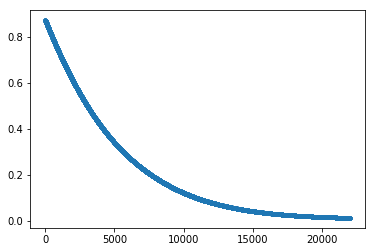

In [35]:
fix, ax = plt.subplots()
ax.plot(lossx, lossy, ".")

### Końcowa wartość LOSS

In [36]:
print('loss', loss)

loss tensor(0.0135, device='cuda:0', grad_fn=<NllLossBackward>)


### Wypisanie wag - wektorów dla poszczególnych znaków

In [37]:
CBOW.module.fc_out.weight

Parameter containing:
tensor([[ 2.1931,  0.8272, -2.0412, -0.6663],
        [ 1.5130,  1.1437, -1.8022,  2.1213],
        [ 1.9682, -1.6273, -1.8342, -1.4252],
        [ 0.9122, -1.7326, -2.3486,  1.0160],
        [ 0.7862, -1.4051, -0.8626,  2.5286],
        [ 1.9869,  0.1184, -0.6159, -2.3581],
        [-2.0315, -0.8995, -2.0305,  1.8326],
        [ 1.5581, -2.1662,  2.4547, -0.7539],
        [ 0.7055,  1.8532,  2.1081,  1.1137],
        [-0.0718,  0.5995, -1.0464, -2.6285],
        [-0.2473,  2.0792, -2.1034, -0.5287],
        [-1.2192, -2.4789, -1.9915, -0.0878],
        [ 1.9364,  0.8407,  2.1112, -0.3539],
        [ 2.3690,  2.3451,  0.0171,  0.6382],
        [ 1.3847, -2.0265,  1.7633,  1.4512],
        [-2.1155, -1.5337, -0.6503, -2.2414],
        [-0.8052,  2.2430,  0.6030,  0.3018],
        [-0.9617, -2.1021,  2.0134, -1.5975],
        [-1.9627,  1.5479, -0.3133, -1.7771],
        [-1.5930,  1.2491,  2.6188, -1.7039],
        [ 2.0714, -0.3166,  2.0823,  2.1153],
        [ 2.

### Testowanie sieci

In [38]:
''' przepisanie slowa na one hot vector '''
wyrazy_testowe = [make_word_vector('mercedes', onehotvectory)]

''' przepisanie slowa na wartosci przy zachowaniu wielkosci okna z procesu uczenia '''
''' UWAGA - w tym procesie ze slowa podanego wyzej zabierana jest ostatnia litera '''
''' zgodnie z definicja funkcji  "make_pre_char_embedding" ostatnia litera trafia na wyjscie sieci'''
''' zatem wpisujac w zbiorze testowym slowo ze zbioru uczacego, na wyjsciu powinnismy otrzymac ostatni znak '''
''' z podanego wyzej slowa 🙃 '''
testing_data, testing_data_labels = make_pre_char_embedding(wyrazy_testowe, minimalnawielkoscokna)

''' reshape wartosci '''
''' wybieramy indeks slowa "0", bo chcemy miec pierwszy przypadek ulozenia wartosci wejsciowych dla sieci '''
''' tzn. wszystkie litery na wejscie, oprocz ostatniej, ktora trafia na wyjscie '''
testing_data = testing_data[0].reshape(1, -1)

''' utworzenie tensora i wyslanie go do wlasciwego urzadzenia (CPU/GPU) '''
TestingTensor = torch.Tensor(testing_data)
TestingTensor = TestingTensor.to(device)

''' dla CrossEntropy wyznaczana jest wartosc przynaleznosci do danej klasy '''
''' im nizsza wartosc, tym lepsze dopasowanie '''
''' do CrossEntropy mozemy podac tylko jedna wartosc do przeliczenia '''
''' dlatego nalezy zrobic tablice tensorow wartosci wszystkich klas '''
''' dla ktorych pozniej przeliczymy LOSS CrossEntropy '''
TestingTensorsClass = [torch.tensor([x]).long().to(device) for x in range(len(unikalne))]

''' bardzo wazne - w sieci nalezy wylaczyc tryb uczenia '''
''' z tego co czytalem, wylacza on m.in. korzystanie z wartosci gradientow, co przyspiesza obliczenia '''
''' wykorzystywac wartosc tylko wtedy, gdy nie planujemy uczyc sieci '''
CBOW.eval()


''' tryb wylaczonych gradientow '''
with torch.no_grad():
    ''' iterujemy przez wszystkie wartosci klas '''
    for x in range(len(unikalne)):
        ''' przeliczamy wartosc '''
        y_ = CBOW(TestingTensor)
        
        ''' chcemy zrobic fajnego print'a, wiec tlumaczymy podawana klase na znak '''
        ''' w drugim argumencie printa otrzymujemy nasz LOSS, '''
        ''' ktory mowi jaki najprawdopodobniej jest ostatni znak podanego slowa '''
        ''' (dla slowa ze zbioru uczacego powinien to byc ostatni znak podanego slowa) '''
        print(translate_class_to_sign(x, classdict), criterion(y_, TestingTensorsClass[x]))

1 tensor(40.2838, device='cuda:0')
2 tensor(22.5190, device='cuda:0')
3 tensor(52.6319, device='cuda:0')
4 tensor(34.3751, device='cuda:0')
5 tensor(19.5292, device='cuda:0')
6 tensor(51.5873, device='cuda:0')
a tensor(10.0097, device='cuda:0')
b tensor(42.5548, device='cuda:0')
c tensor(15.9288, device='cuda:0')
d tensor(42.1251, device='cuda:0')
e tensor(26.0722, device='cuda:0')
g tensor(32.0403, device='cuda:0')
h tensor(32.2573, device='cuda:0')
i tensor(26.1492, device='cuda:0')
j tensor(26.4934, device='cuda:0')
k tensor(34.4740, device='cuda:0')
l tensor(12.7101, device='cuda:0')
m tensor(33.1420, device='cuda:0')
n tensor(25.1086, device='cuda:0')
o tensor(21.8157, device='cuda:0')
p tensor(22.7463, device='cuda:0')
q tensor(36.9912, device='cuda:0')
r tensor(9.9928, device='cuda:0')
s tensor(0.0001, device='cuda:0')
t tensor(10.3798, device='cuda:0')
u tensor(48.5107, device='cuda:0')
w tensor(43.5843, device='cuda:0')
y tensor(42.6082, device='cuda:0')
z tensor(36.2496, devi

### Z kodu wyżej zrobienie funkcji 
Tutaj generalnie jest taki myk, że słowo które chcemy przetestować jest bezpośrednio konwertowane na wektor one hot wektorów. Nie występuje tutaj dopasowywanie słowa do wielkości okna.

#### Ale dlaczego?
Rzecz w tym, że biorąc pod uwagę słowo "abc" przy wielkości okna = 8 nie bylibyśmy w stanie ułożyć wektorów tak, by pokazało przewidywany znak dla znaku pomiędzy znakami słowa.

##### Przykład
Chcemy wyznaczyć prawdopodobieństwo wystąpienia jakiegoś znaku pomiędzy znakami "abb" oraz "cc". Stosując dopasowywanie do wielkości okna moglibyśmy dopasowywać jedynie prawdopodobieństwo ostatniego znaku, albo innego typu ułożenia, ale na to trza pisać osobne funkcje 😜

#### Jak to więcj działa
Metoda ta wykorzystuje opisywany wyżej myk. Nie jest on do końca poprawny, ale działa, a jak działa i jest głupie, to nie jest aż takie głupie. Znaki naszego słowa są bezpośrednio konwertowane na one hot vectory. Oznacza to, że musimy wybrać jakiś znak, który nie wystąpi w zbiorze znaków. Odwołując się do zbioru naszych haseł jestem przekonany, że na pewno nie wystąpi w nim... emotka 🈳 "japoński przycisk 'wolne miejsce'".

##### Przykład
Mamy wielkość okna = 8, chcemy sprawdzić predykcję dla znaku pomiędzy "abb" oraz "cc". Nasze słowo musimy zatem zapisać jako:
🈳abbcc🈳🈳.


In [39]:
print(minimalnawielkoscokna)

14


In [40]:
''' FUNKCJA WYKORZYSTUJACA EMOTKI 😆 '''
''' WYKORZYSTYWANA EMOTKA: 🈳, WE SE SKOPIUJ  '''
def test_word(word, fill = 0):
    word_one_hot = np.array([onehotvectory[letter] if letter != '🈳' else [fill for x in range(len(unikalne))] for letter in word])

    if len(word_one_hot) != minimalnawielkoscokna:
        raise Exception("Slowo o blednej dluosci wejsciowej")

    TestTensor = torch.Tensor(word_one_hot.reshape(1, -1)).to(device)

    TestingTensorsClass = [torch.tensor([x]).long().to(device) for x in range(len(unikalne))]

    prawdopodobienstwa = {}
    
    with torch.no_grad():
        for x in range(len(unikalne)):
            y_ = CBOW(TestTensor)
            
            ''' obliczenie CrossEntropyLoss i zapisanie do słownika '''
            prawdopodobienstwa[translate_class_to_sign(x, classdict)] = criterion(y_, TestingTensorsClass[x]).item()
            
        ''' posortowanie i wypisanie predykcji '''
        for item in sorted(prawdopodobienstwa, key=prawdopodobienstwa.get):
            print(item, prawdopodobienstwa[item])
            
test_word("🈳mercedes🈳🈳🈳🈳🈳")

n 0.5373992919921875
e 1.1352081298828125
d 2.796807289123535
z 3.4891624450683594
l 6.445146560668945
o 7.607002258300781
y 7.849733352661133
k 8.552597999572754
1 8.79341983795166
6 10.951892852783203
i 11.683647155761719
w 13.154324531555176
a 15.852775573730469
t 16.237091064453125
3 18.450305938720703
c 18.631845474243164
h 19.0881404876709
s 19.186553955078125
2 19.213600158691406
g 19.8337345123291
m 19.9807071685791
4 24.092668533325195
u 25.20496368408203
5 28.46202850341797
b 31.598663330078125
p 33.29864501953125
j 33.79948425292969
r 34.65837478637695
q 35.61117172241211


In [60]:
def similarity(letter1, letter2):
    id1=0
    id2=0
    
    for classid in classdict:
        if classid == letter1:
            id1 = classdict[classid]
        
        if classid == letter2:
            id2 = classdict[classid]
    
    v1 = CBOW.cpu().module.fc_out.weight[id1].detach().numpy()
    v2 = CBOW.cpu().module.fc_out.weight[id2].detach().numpy()
    
    d = np.dot(v1, v2)
    
    l1 = np.sqrt(np.sum(v1**2))
    l2 = np.sqrt(np.sum(v2**2))
    
    return d/(l1*l2)


literka = "a"

print(classdict)

for classid in classdict:
    print(literka+" oraz "+classid+": ", similarity(literka, classid))

#print(similarity("z", "a"))

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, 'a': 6, 'b': 7, 'c': 8, 'd': 9, 'e': 10, 'g': 11, 'h': 12, 'i': 13, 'j': 14, 'k': 15, 'l': 16, 'm': 17, 'n': 18, 'o': 19, 'p': 20, 'q': 21, 'r': 22, 's': 23, 't': 24, 'u': 25, 'w': 26, 'y': 27, 'z': 28}
a oraz 1:  -0.20318055
a oraz 2:  0.29019618
a oraz 3:  -0.11692118
a oraz 4:  0.55803335
a oraz 5:  0.5505853
a oraz 6:  -0.6505636
a oraz a:  1.0000001
a oraz b:  -0.58106524
a oraz c:  -0.48864615
a oraz d:  -0.3027108
a oraz e:  0.18205574
a oraz g:  0.71550846
a oraz h:  -0.90853775
a oraz i:  -0.48387635
a oraz j:  -0.1617659
a oraz k:  0.23408662
a oraz l:  -0.12063607
a oraz m:  -0.26033157
a oraz n:  -0.00235564
a oraz o:  -0.48232433
a oraz p:  -0.3338954
a oraz q:  -0.076077506
a oraz r:  0.3336214
a oraz s:  0.40507293
a oraz t:  0.4806048
a oraz u:  -0.39331108
a oraz w:  -0.8871496
a oraz y:  0.189663
a oraz z:  -0.8224315


#### Ciekawostka 1
Może emotki, to sposób na nowe i o wiele bezpieczniejsze hasła?

![WP hasło emotkami](https://i.imgur.com/1pQVulX.png)

W WP mamy filtry na pole z hasłem.

A w 🍊🍊.net nie 😎

![Morele.net](https://i.imgur.com/Nj5Sujm.png)

Na konto da się normalnie zalogować i korzystać 😆

#### Ciekawostka 2
+ 🧑🏿 składa się z 4 znaków
+ 💚 składa się z 2 znaków
+ 👨‍👨‍👧‍👧 składa się z 11 znaków 😮

#### Ciekawostka 3
[Generator hasła emoji](https://passmoji.com/)